# Gravitational Waves in General Relativity XI Cylindrical - Spherical Waves  by Marder 
##  Geoff Cope
##  University of Utah
##  December 22, 2021

Metric is taken from "Gravitational Waves in General Relativity XI. Cylindrical-Spherical Waves" by Marder.  The capital variable R is changed to r so that it doesn't conflict with the Ricci Tensor R.

https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1969.0181

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
T,r,phi,Z,dT,dr,dphi,dZ = symbols( 'T r phi Z dT dr dphi dZ' ) 

In [4]:
gamma = symbols('gamma')
psi = symbols('psi')

In [5]:
variables = Matrix( [T,r,phi,Z])
variables

⎡T⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣Z⎦

In [6]:
differentials = Matrix( [dT,dr,dphi,dZ])
differentials

⎡ dT ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dZ ⎦

In [7]:
gamma = Function('gamma')(r,T)
gamma

In [8]:
psi = Function('psi')(r,T)
psi

In [9]:
lineElement = expand(exp(2*(gamma-psi)) * ( dT**2 - dr**2 ) - r**2 * exp(-2*psi) * dphi**2 - exp(2*psi)*dZ**2)
lineElement 

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(r, T)  -2⋅ψ(r, T)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅γ(r, T)  -2⋅ψ(r, T)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅ψ(r, T)             ⎥
⎢          0                        0             -r ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅ψ(r, T)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡ 2⋅γ(r, T)  -2⋅ψ(r, T)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅γ(r, T)  -2⋅ψ(r, T)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅ψ(r, T)             ⎥
⎢          0                        0             -r ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅ψ(r, T)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("T r phi Z")
T,r,phi,Z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, T)) - ──(ψ(r, T))  ──(γ(r, T)) - ──(ψ(r, T))               0                      
⎢⎢∂T            ∂T           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, T)) - ──(ψ(r, T))  ──(γ(r, T)) - ──(ψ(r, T))               0                      
⎢⎢∂r            ∂r           ∂T            ∂T                                               
⎢⎢                                                                                          
⎢⎢                                                        2  -2⋅γ(r, T) ∂                   
⎢⎢            0                          0              -r ⋅ℯ          ⋅──(ψ(r, T))         
⎢⎢                                                                    

In [17]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡    ⎛  2              2                           2     2              2         ⎞         
⎢    ⎜ ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂     
⎢- r⋅⎜───(γ(r, T)) - ───(γ(r, T)) + 2⋅⎜──(ψ(r, T))⎟  - ───(ψ(r, T)) + ───(ψ(r, T))⎟ + ──(γ(r
⎢    ⎜  2              2              ⎝∂T         ⎠      2              2         ⎟   ∂r    
⎢    ⎝∂T             ∂r                                ∂T             ∂r          ⎠         
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                      r                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                ∂    

In [18]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                        ∂                                               ∂  
⎢               2                2   1.0⋅──(γ(r, T))                                     ──(
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂r                    ∂           ∂             ∂T 
⎢- ⎜──(ψ(r, T))⎟  - ⎜──(ψ(r, T))⎟  + ───────────────       - 2⋅──(ψ(r, T))⋅──(ψ(r, T)) + ───
⎢  ⎝∂T         ⎠    ⎝∂r         ⎠           r                  ∂T          ∂r               
⎢                                                                                           
⎢                                   ∂                                                       
⎢                                   ──(γ(r, T))                      2                2   1.
⎢         ∂           ∂             ∂T                  ⎛∂          ⎞    ⎛∂          ⎞      
⎢     - 2⋅──(ψ(r, T))⋅──(ψ(r, T)) + ───────────       - ⎜──(ψ(r, T))⎟  - ⎜──(ψ(r, T))⎟  + ──
⎢         ∂T          ∂r                 r              ⎝∂T         ⎠ 

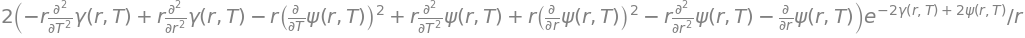

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

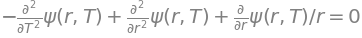

In [30]:
equation2 = Eq(expand((1/r)*simplify(Ric.tensor())[2,2].args[1]),0)
equation2

In [31]:
equation3a = Eq( diff(gamma,T), solve( simplify(Ric.tensor())[1,0] , diff(gamma,T) )[0])
equation3a 

In [32]:
equation3b =Eq(diff(gamma,r),solve( simplify(einst.tensor())[0,0], diff(gamma,r) )[0] )
equation3b

In [34]:
fieldEquations = Matrix([equation2,equation3a,equation3b])
fieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(r, T))     ⎥
⎢    ∂              ∂             ∂r              ⎥
⎢ - ───(ψ(r, T)) + ───(ψ(r, T)) + ─────────── = 0 ⎥
⎢     2              2                 r          ⎥
⎢   ∂T             ∂r                             ⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(r, T)) = 2⋅r⋅──(ψ(r, T))⋅──(ψ(r, T))    ⎥
⎢    ∂T                ∂T          ∂r             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(r, T)) = r⋅⎜⎜──(ψ(r, T))⎟  + ⎜──(ψ(r, T))⎟ ⎟⎥
⎣∂r              ⎝⎝∂T         ⎠    ⎝∂r         ⎠ ⎠⎦

In [35]:
X, Y = map(Function, 'XY')

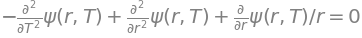

In [37]:
eq = fieldEquations[0]
eq

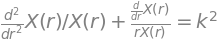

In [45]:
xODE = Eq(pde_separate( eq, psi, [X(r),Y(T)])[0] , k**2 ) 
xODE

In [46]:
xSolution = dsolve( xODE , X(r))
xSolution 

In [47]:
#  Here we arbitrarily set one of the Bessel functions equal to zero... fix this later
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],0).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

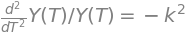

In [48]:
yODE = Eq( pde_separate( eq, psi, [X(r),Y(T)])[1] , - k**2 ) 
yODE

In [49]:
ySolution = dsolve( yODE , Y(T))
ySolution 

In [50]:
#  Here we arbitrarily set cos equal to zero... fix this later
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],0)
ySolutionParticular

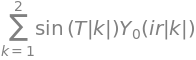

In [51]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [53]:
psiSumTwoTerms = Eq(psi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

In [55]:
dgammadtPDE = fieldEquations[1].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadtPDE

In [56]:
dgammadtPDE.doit()

In [57]:
expand(dgammadtPDE.doit())

In [58]:
integrateGammaWRTt = pdsolve( expand(dgammadtPDE.doit()) )
integrateGammaWRTt 

In [66]:
dgammadrPDE = fieldEquations[2].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadrPDE

In [67]:
dgammadrPDE.doit()

In [68]:
expand(dgammadrPDE.doit())

In [69]:
integrateGammaWRTr = pdsolve(expand(dgammadrPDE.doit()))
integrateGammaWRTr